In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
univ=pd.read_csv("/content/Universities.csv")

In [3]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [12]:
#Normalisation Function (Standard Scaler to makes values mean 0 and -1 +1 as std dev)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_univ=scaler.fit_transform(univ.iloc[:,1:])

In [13]:
scaler_univ

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [15]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaler_univ)
  wcss.append(kmeans.inertia_)

In [16]:
wcss

[150.0,
 64.14528395010268,
 44.531761731450956,
 33.654341806512235,
 28.622383307274227,
 22.704584217335714,
 18.56891703085987,
 16.171397616965237,
 13.47880438976081,
 11.025256225196053]

Text(0, 0.5, 'WCSS')

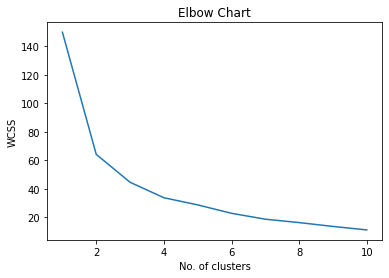

In [19]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Chart")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")

In [22]:
# Building Cluster Algorithm
cluster_new=KMeans(n_clusters=4,random_state=42)
cluster_new.fit(scaler_univ)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [23]:
cluster_new.labels_  #(This will show the clusters created)

array([0, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0], dtype=int32)

In [24]:
cluster_new.cluster_centers_  # This will show the centers of each cluster 

array([[ 0.80273428,  0.68086062, -0.90136381, -0.43159988,  0.44062556,
         0.79526289],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ]])

In [27]:
# Assign clusters to dataset
univ["clusterid"]=cluster_new.labels_ 

In [33]:
univ.groupby(["clusterid"]).agg(["mean"]).reset_index()  # Here we can see 0 cluster is performing well since it s mean top 10 is good and expense is also less

,clusterid,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
1,1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,2,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
3,3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


In [36]:
univ[univ["clusterid"]==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid
0,Brown,1310,89,22,13,22704,94,0
3,Columbia,1310,76,24,12,31510,88,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
8,Harvard,1400,91,14,11,39525,97,0
10,MIT,1380,94,30,10,34870,91,0
14,Princeton,1375,91,14,8,30220,95,0
16,Stanford,1360,90,20,12,36450,93,0
24,Yale,1375,95,19,11,43514,96,0


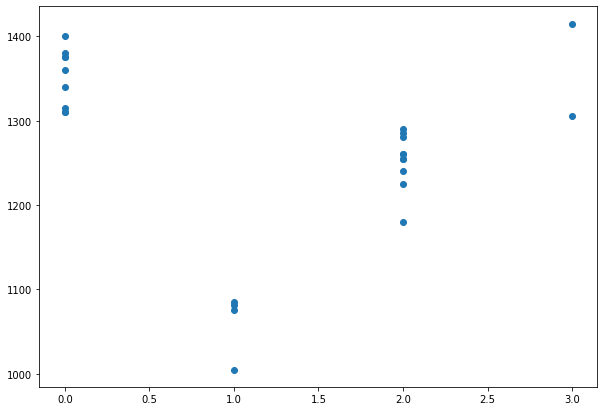

In [38]:
# Plot clusters
plt.figure(figsize=(10,7))
plt.scatter(univ["clusterid"],univ["SAT"])